<a href="https://colab.research.google.com/github/MeeraSadhu/ASSIGNMENTLETSUPGRADE_ML-submission/blob/main/Assignment_ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df_train=pd.read_csv('/content/gdrive/My Drive/dataset/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test=pd.read_csv('/content/gdrive/My Drive/dataset/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
def bar_chart_func(dataset, feature, stacked = True):
    survived = dataset[dataset["Survived"] == 1][feature].value_counts()
    dead = dataset[dataset["Survived"] == 0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ["Passengers Survived", "Passengers Died"]
    ax = df_survived_dead.plot(kind = "bar", stacked = stacked, figsize = (7,7))

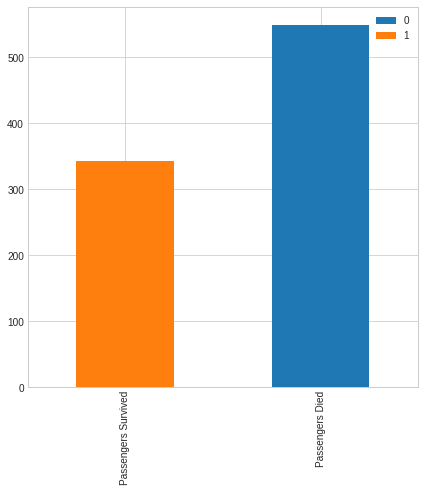

In [9]:
bar_chart_func(df_train, "Survived")

In [10]:
df_train["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [11]:
df_train.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

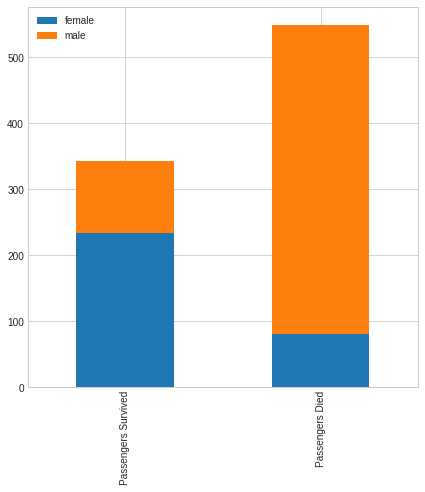

In [12]:
bar_chart_func(df_train, "Sex")

In [13]:
df_train.groupby(["Pclass"]).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


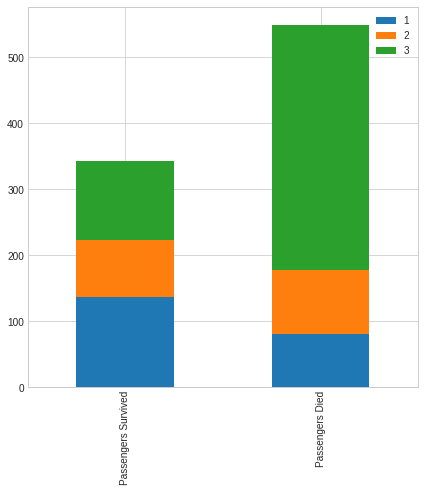

In [14]:
bar_chart_func(df_train, "Pclass")

In [15]:
def bar_chart_compare(dataset, feature1, feature2 = None):
    plt.figure(figsize = [7,7])
    plt.title("Survival rate by sex and class")
    g = sns.barplot(x = feature1, y = "Survived", hue = feature2, ci = None, data = dataset).set_ylabel("Survival Rate")


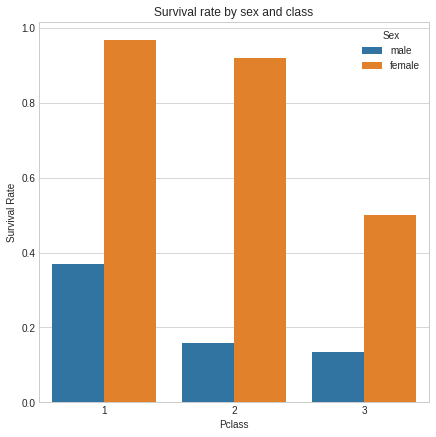

In [16]:
#Bar chart of gender vs survival rate

bar_chart_compare(df_train, "Pclass", "Sex")

In [17]:
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (7,7)):
    fig, ax = plt.subplots(figsize = fsize)
    ax.set_title(title)
    sns.distplot(df_train[feature], color = "g", bins = bins, ax = ax)

In [18]:
def plot_kernel_density_estimate_survivors(dataset, feature1, title, fsize = (7,7)):
    fig, ax = plt.subplots(figsize = fsize)
    ax.set_title(title)
    sns.kdeplot(dataset[feature1].loc[df_train["Survived"] == 1],
               shade = True, ax = ax, label = "Survived").set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[df_train["Survived"] == 0],
               shade = True, ax = ax, label = "Died")

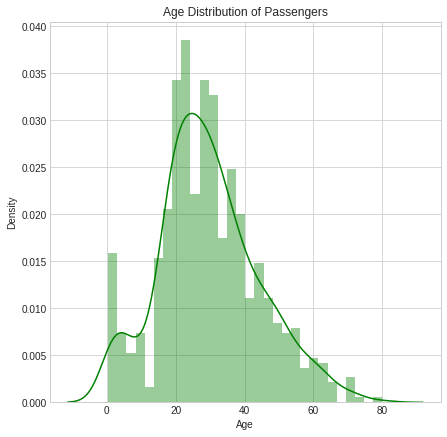

In [19]:
plot_distribution(df_train, "Age", "Age Distribution of Passengers")

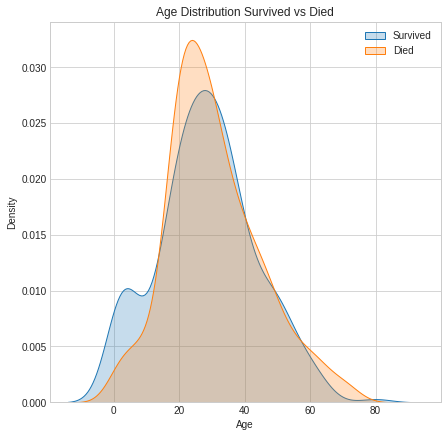

In [20]:
plot_kernel_density_estimate_survivors(df_train, "Age", "Age Distribution Survived vs Died")
plt.legend()

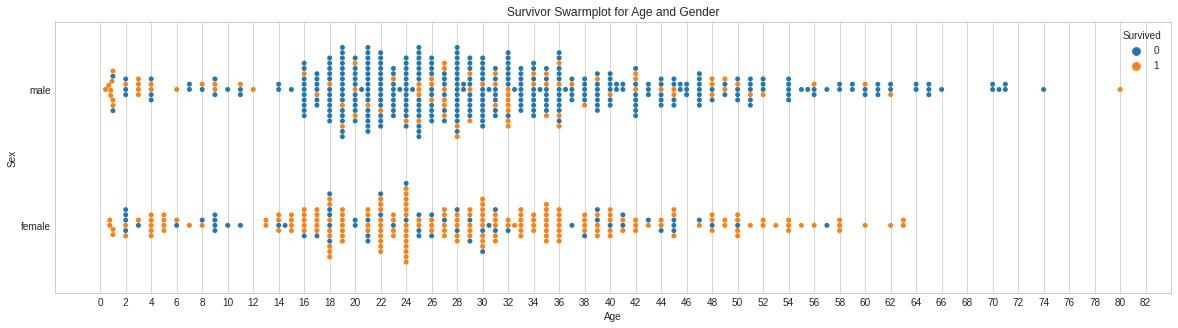

In [21]:
def plot_swarm_survivors(dataset, feature1, feature2, title, fsize = (155)):
    fig, ax = plt.subplots(figsize = (20,5))
    plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y = feature1, x = feature2, hue = "Survived", data = df_train).set_title(title)
#Age vs Sex swarm plot

plot_swarm_survivors(df_train, "Sex", "Age", "Survivor Swarmplot for Age and Gender")

The swarm plot above shows that a big portion of male survivors are passengers between 0 and 12 years of age. It’s also interesting to see that the oldest passenger 80 year old man survived.

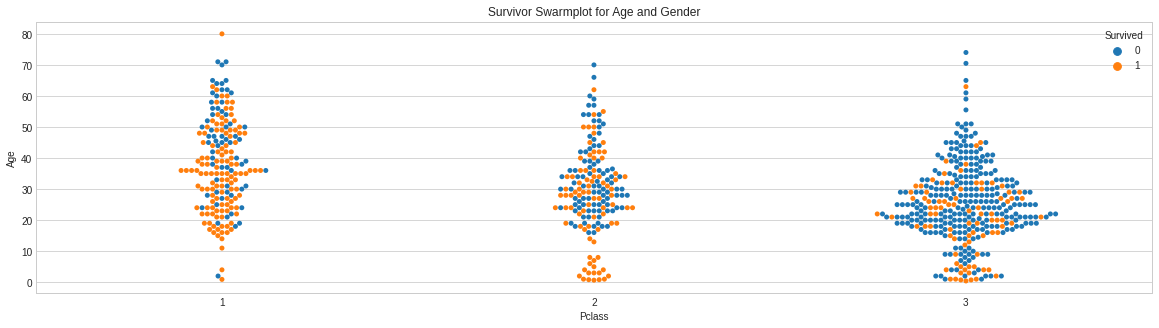

In [22]:
plot_swarm_survivors(df_train, "Age", "Pclass", "Survivor Swarmplot for Age and Gender")

In [23]:
def plot_quartiles(dataset, feature, title, categories):
    fig, ax = plt.subplots(figsize = (7,7))
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels = categories)
    ax.set_title(title)
    sns.barplot(x = fare_ranges, y = dataset.Survived, ci = None, ax = ax).set_ylabel("Survival Rate")

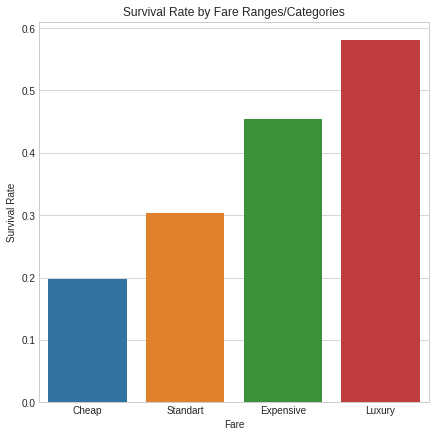

In [24]:
#Bar plot fare categories

categories = ["Cheap", "Standart", "Expensive", "Luxury"]
plot_quartiles(df_train, "Fare", "Survival Rate by Fare Ranges/Categories", categories)

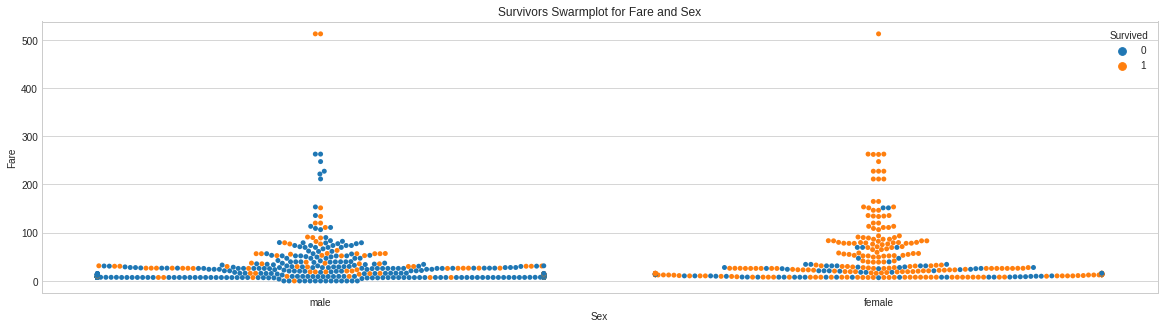

In [25]:
plot_swarm_survivors(df_train, "Fare", "Sex", "Survivors Swarmplot for Fare and Sex")

Irrespective of gender all passengers with a fare above 500 survived.
All male passenger that paid between 200–300 died.
All female passenger that paid between 200–300 survived.

In [26]:
df_train.loc[df_train.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [27]:
# Replace Fare == 0 with NaN
df_train.loc[df_train["Fare"] == 0, "Fare"] = np.NaN
df_test.loc[df_train["Fare"] == 0, "Fare"] = np.NaN
def show_countplot(dataset, feature, title, fsize = (7,7)):
    fig,ax = plt.subplots(figsize = fsize)
    sns.countplot(dataset[feature], ax = ax).set_title(title)
def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize = (7,7))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax= ax).set_title(title)

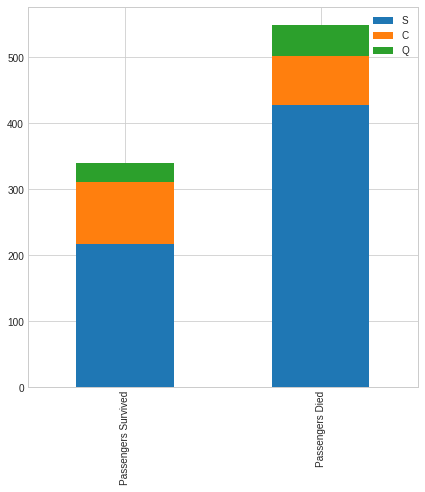

In [28]:
bar_chart_func(df_train,"Embarked")

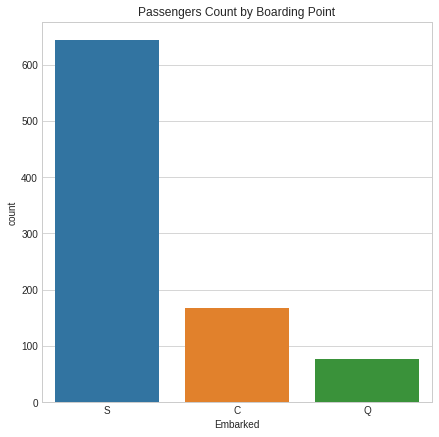

In [29]:
show_countplot(df_train, "Embarked", "Passengers Count by Boarding Point")

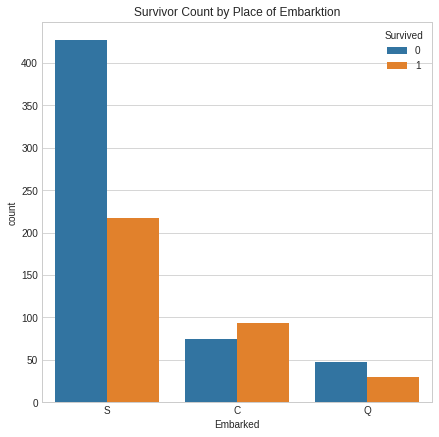

In [30]:
df_train["Embarked"].value_counts().to_frame()


show_compare_countplot(df_train, "Embarked", "Survived", "Survivor Count by Place of Embarktion")


In [31]:
pd.pivot_table(df_train, index = "Survived", columns = "Embarked", values = "Ticket", aggfunc = "count")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


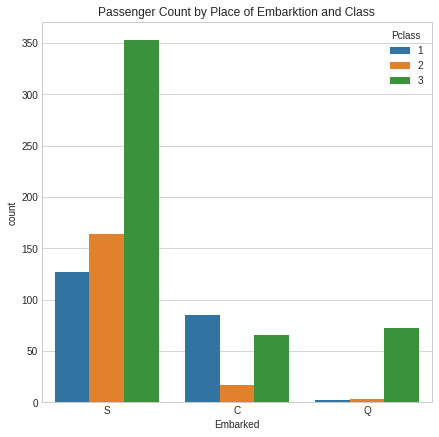

In [32]:
show_compare_countplot(df_train, "Embarked", "Pclass", "Passenger Count by Place of Embarktion and Class")

In [33]:
df_train.groupby(["Embarked", "Pclass"]).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

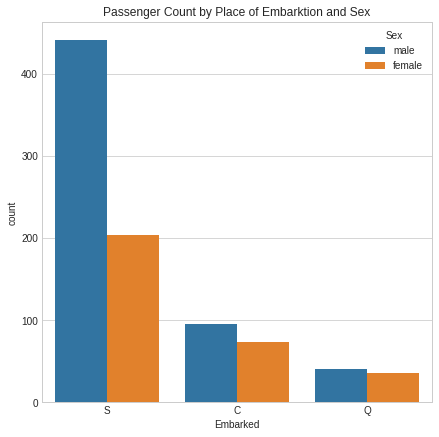

In [34]:
show_compare_countplot(df_train, "Embarked", "Sex", "Passenger Count by Place of Embarktion and Sex")

Text(0.5, 1.0, 'Survival Rate by Siblings / Spouses Aboard The Titanic')

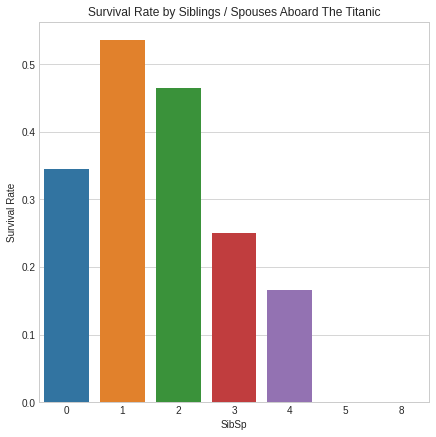

In [35]:
bar_chart_compare(df_train, "SibSp")
plt.title("Survival Rate by Siblings / Spouses Aboard The Titanic")

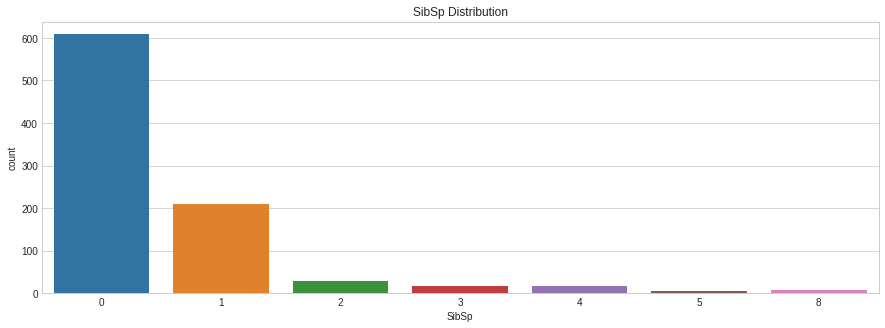

In [36]:
show_countplot(df_train, "SibSp", "SibSp Distribution", (15,5))

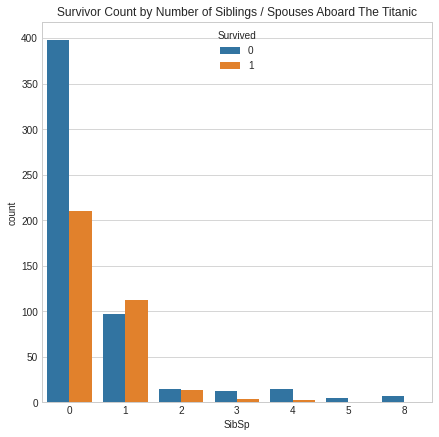

In [37]:
show_compare_countplot(df_train, "SibSp", "Survived", "Survivor Count by Number of Siblings / Spouses Aboard The Titanic")

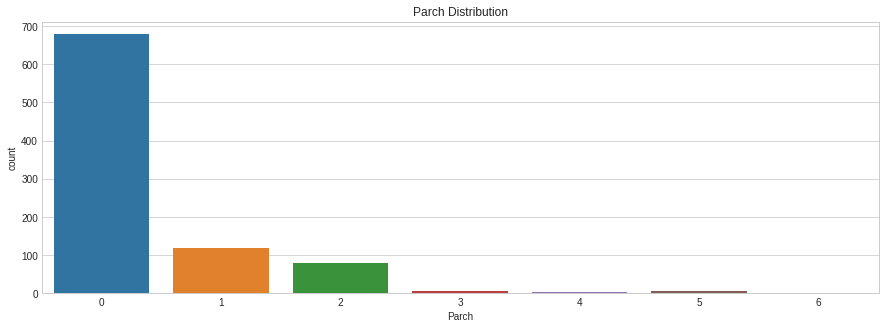

In [38]:
show_countplot(df_train, "Parch", "Parch Distribution", (15,5))

Text(0.5, 1.0, 'Survival Rate by Parch')

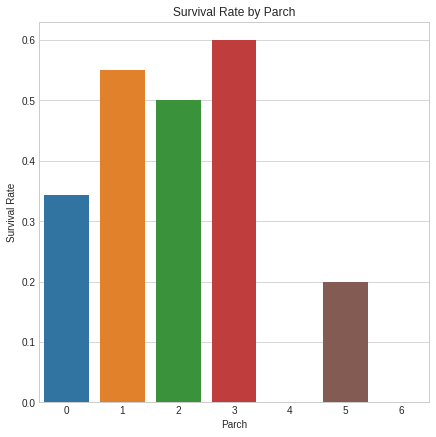

In [39]:
bar_chart_compare(df_train, "Parch")
plt.title("Survival Rate by Parch")

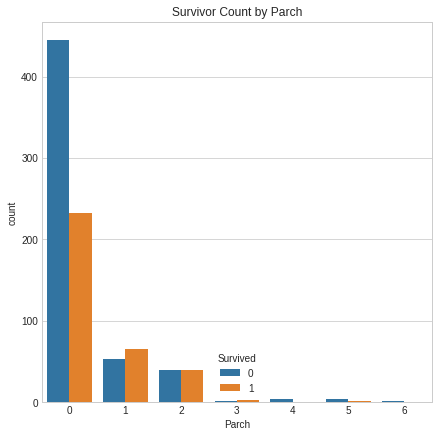

In [40]:
show_compare_countplot(df_train, "Parch", "Survived", "Survivor Count by Parch")

In [41]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
        

In [42]:
df_train.iloc[detect_outliers(df_train,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [43]:
df_train = df_train.drop(detect_outliers(df_train,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [44]:
df_train_len = len(df_train)
df_train = pd.concat([df_train,df_test],axis = 0).reset_index(drop = True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df_train.columns[df_train.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [47]:
df_train.isnull().sum().to_frame()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,16


In [48]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


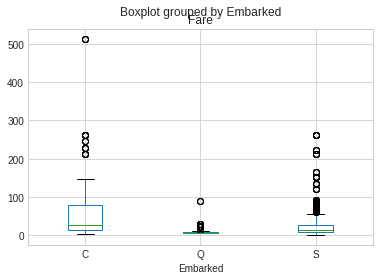

In [49]:
df_train.boxplot(column = "Fare", by = "Embarked")

In [50]:
df_train["Embarked"] = df_train["Embarked"].fillna("C")
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [51]:
df_train[df_train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,NaN,NaN,S


In [52]:
df_train["Fare"] = df_train["Fare"].fillna(np.mean(df_train[df_train["Pclass"] == 3]["Fare"]))
df_train[df_train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
df_train[df_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


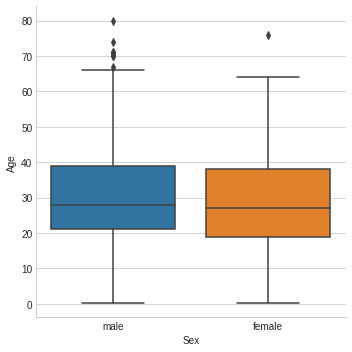

In [54]:
sns.factorplot(x = "Sex", y = "Age", data = df_train, kind = "box")
plt.show()

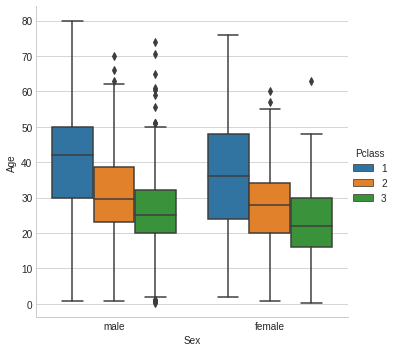

In [55]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass", data = df_train, kind = "box")
plt.show()

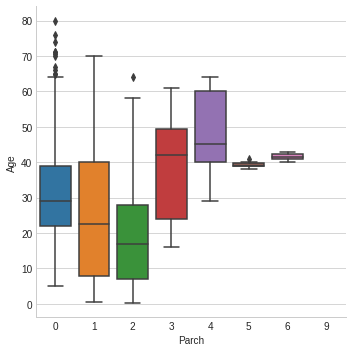

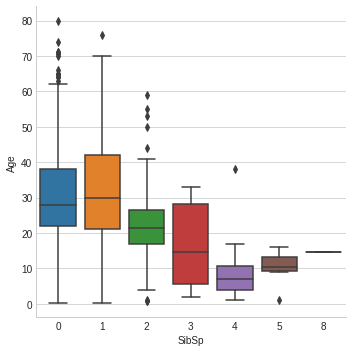

In [56]:
sns.factorplot(x = "Parch", y = "Age", data = df_train, kind = "box")
sns.factorplot(x = "SibSp", y  = "Age", data = df_train, kind = "box")
plt.show()

In [57]:
df_train["Sex"] = [1 if each == "male" else 0 for each in df_train["Sex"]]
df_train.Sex

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

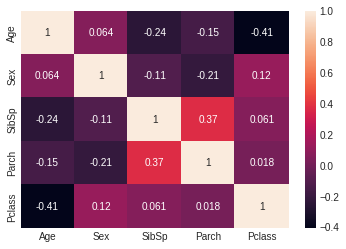

In [58]:
sns.heatmap(df_train[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

In [59]:
index_nan_age = list(df_train["Age"][df_train["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = df_train["Age"][((df_train["SibSp"] == df_train.iloc[i]["SibSp"]) & (df_train["Parch"] == df_train.iloc[i]["Parch"]) & (df_train["Pclass"] == df_train.iloc[i]["Pclass"]))].median()
    age_med = df_train["Age"].median()
    if not np.isnan(age_pred):
        df_train["Age"].iloc[i] = age_pred
    else:
        df_train["Age"].iloc[i] = age_med

In [60]:
df_train[df_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [61]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [62]:
df_train["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [63]:
name = df_train["Name"]
df_train["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [64]:
df_train["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

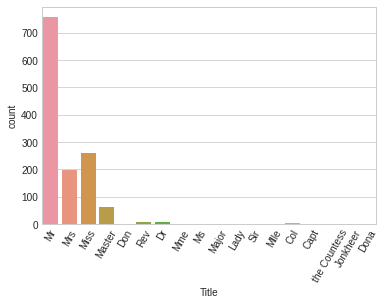

In [65]:
sns.countplot(x = "Title", data = df_train)
plt.xticks(rotation = 60)
plt.show()

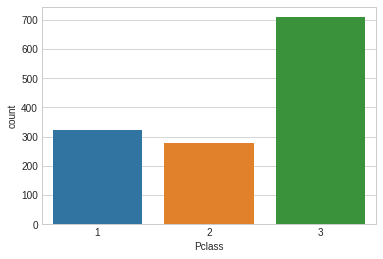

In [66]:
import seaborn as sns
sns.countplot(x = "Pclass", data = df_train)
plt.show()

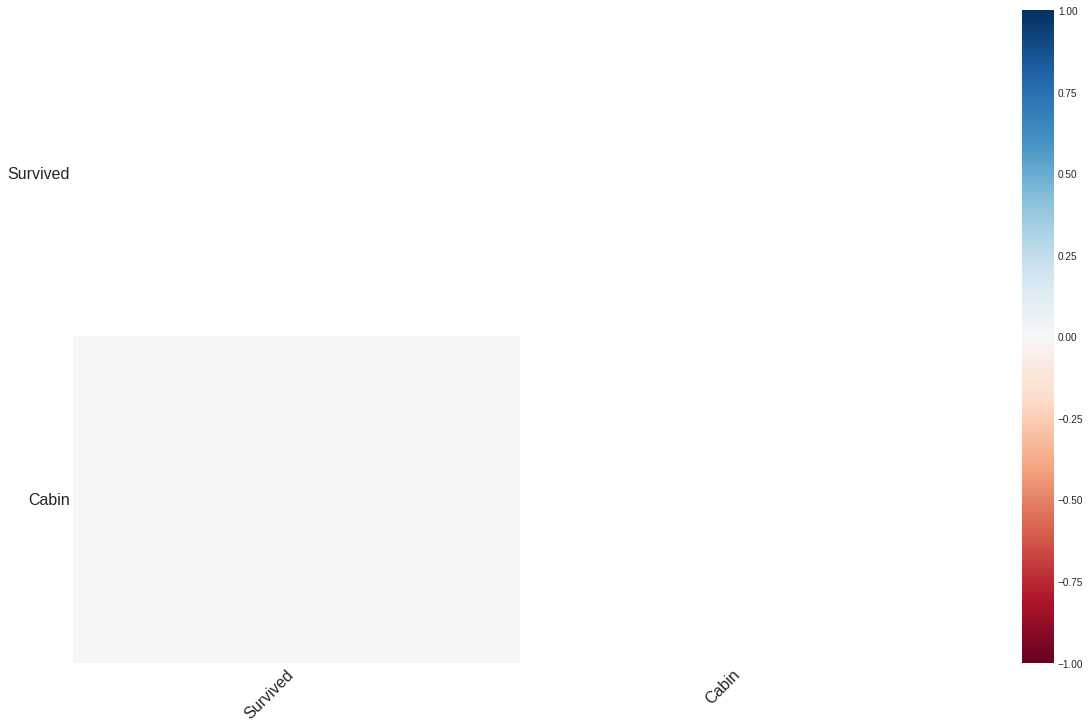

In [67]:
#correlation
import missingno as msno
msno.heatmap(df_train, labels = True)

In [68]:
# Columns having missing values
missing_columns = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
missing_columns

['Survived', 'Cabin']

In [70]:
for idx in range(df_train.shape[0]):
    df_train.loc[idx, 'missing_count'] = df_train.iloc[idx, :].isnull().sum()  

In [71]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_train.shape[0]))

df_train.drop(df_train[df_train['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_train.shape[0]))

Samples Before Removal : 1309
Samples After Removal : 1309


In [72]:
#imputation

In [74]:
from sklearn.impute import KNNImputer


In [75]:
num_cols = [col for col in df_train.columns if df_train[col].dtype != 'object']
print(num_cols)
df_train = df_train[num_cols]

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'missing_count']


In [76]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_train)

KNNImputer(n_neighbors=3)

In [77]:
X = knn.transform(df_train)

In [78]:
df_train = pd.DataFrame(X, columns = num_cols)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   float64
 1   Survived       1309 non-null   float64
 2   Pclass         1309 non-null   float64
 3   Sex            1309 non-null   float64
 4   Age            1309 non-null   float64
 5   SibSp          1309 non-null   float64
 6   Parch          1309 non-null   float64
 7   Fare           1309 non-null   float64
 8   missing_count  1309 non-null   float64
dtypes: float64(9)
memory usage: 92.2 KB


In [79]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']

for col in cat_cols:
    df_train[col] = lb.fit_transform(df_train[col])

In [81]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df_train):
    missing_cols = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df_train.columns if df_train[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df_train[col].dtype != 'object']

    # df_train = df_train[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute  
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)
        col_missing = df_train[df_train[col].isnull()]
        temp = df_train.drop(df_train[df_train[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df_train.loc[col_missing.index, col] = y_pred
        
    return df_train

In [82]:
df_new = tree_imputation(df_train)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   float64
 1   Survived       1309 non-null   float64
 2   Pclass         1309 non-null   float64
 3   Sex            1309 non-null   float64
 4   Age            1309 non-null   float64
 5   SibSp          1309 non-null   float64
 6   Parch          1309 non-null   float64
 7   Fare           1309 non-null   float64
 8   missing_count  1309 non-null   float64
dtypes: float64(9)
memory usage: 92.2 KB


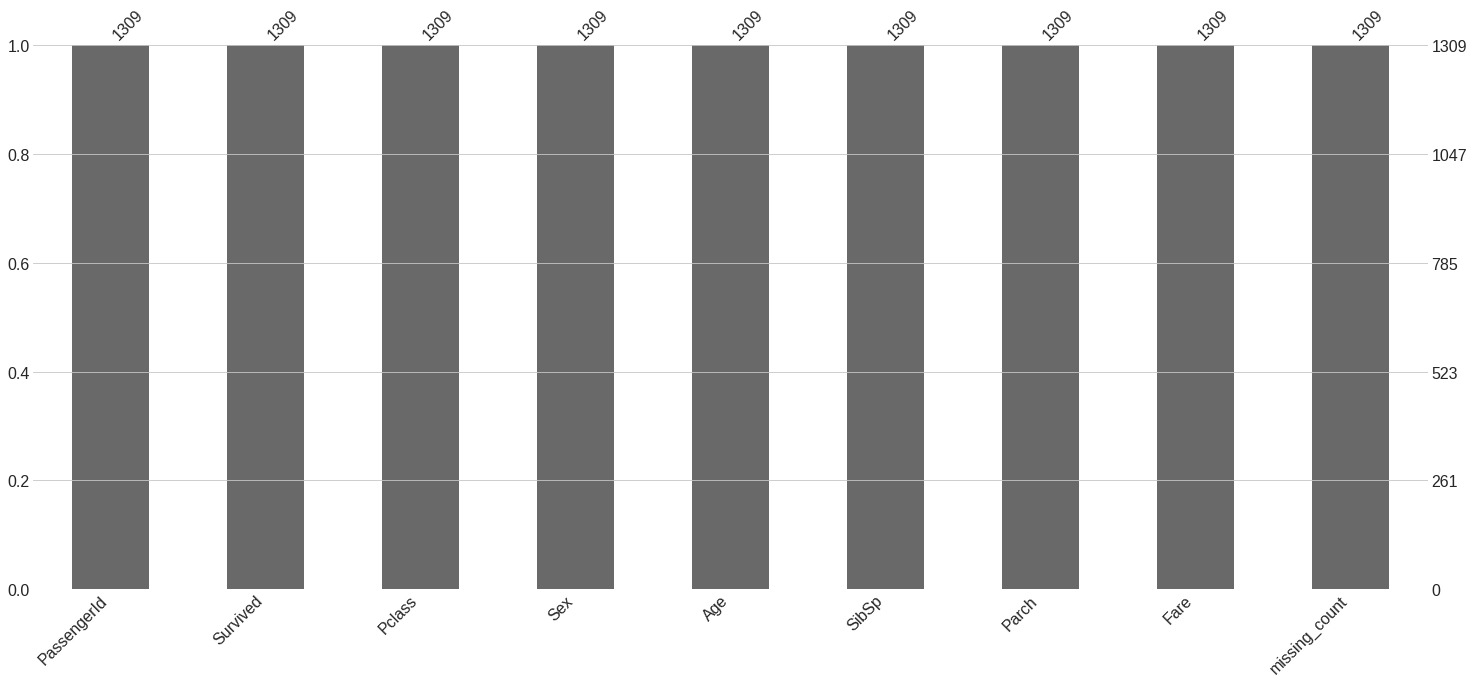

In [83]:
msno.bar(df_new)
plt.show()

In [85]:
df_new = pd.concat([df_train[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,missing_count
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,1.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,1.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [86]:
df_train = df_new.copy()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']

for col in cat_cols:
    df_train[col] = lb.fit_transform(df_train[col])

In [92]:
def target_encoding(df_train, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df_train.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']
        
        smooth = (count * mean + weight * mean) / (weight + count)

        df_train.loc[:, col] = df_train.loc[:, col].map(smooth)

    return df_train

In [93]:
df_train = df_new.copy()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']

for col in cat_cols:
    df_train[col] = lb.fit_transform(df_train[col])

In [94]:
df_train = target_encoding(df_train, cat_cols)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,missing_count
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,1.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,1.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [103]:
feature_cols = ['Fare', 'Parch', 'SibSp', 'Pclass']
#feature_cols = ['Pclass', 'FamilySize', 'PassengerType_Adult', 'PassengerType_Child', 'PassengerType_Infant', 
#                'PassengerType_Senior', 'PassengerType_Youth', 'Gender', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
#                'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5', 'Fare_6', 'Fare_7', 'Fare_8', 
#                'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df_train[feature_cols]
y = df_train.Age

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)


LinearRegression()

In [104]:
# predict for a new observation
p = lm.predict(df_train[feature_cols])

# Now we can constuct a vector of errors
err = abs(p-y)
#print(y[:10])
#print(p[:10])
# Let's see the error on the first 10 predictions
print (err[:10])

0     1.460054
1     0.744415
2     0.067138
3     2.286061
4     9.067347
5     0.931968
6    14.237926
7    15.507522
8     3.035479
9    16.373232
Name: Age, dtype: float64


In [105]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
print(total_error)
# Compute RMSE
rmse = np.sqrt(total_error/len(p))
print(rmse)

172130.4143836209
11.467242160529967


In [106]:
# predict for a new observation
p1 = lm.predict(df_train[feature_cols])
print(p1[:10])
p1.shape
df_train.shape

[23.46005377 37.25558542 25.93286203 37.28606063 25.93265253 25.93196822
 39.76207424 17.50752186 23.96452074 30.37323184]


(1309, 9)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model, datasets
full = pd.concat([df_train, df_test], keys=['train','test'])
#full = pd.concat([train, test])
full.head()
train = full.loc['train']
test = full.loc['test']

In [110]:
y = train.loc[:,'Survived']
#X = train.loc[:,['PassengerId', 'Age', 'Pclass', 'PassengerType_Adult', 'PassengerType_Child', 'PassengerType_Infant', 
#                 'PassengerType_Senior', 'PassengerType_Youth', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 
#                 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5', 'Fare_6', 'Fare_7', 'Fare_8', 'FamilySize', 
#                 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Gender']]
X = train.loc[:,['PassengerId','Age','Fare', 'Pclass','Embarked']]

In [114]:
train_data = train.values
train_X = X.values
train_y = y.values
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.30, random_state=22)

In [117]:
k_fold = KFold(len(train_y), shuffle=True, random_state=0)
#clf = RandomForestClassifier(n_estimators=est, min_samples_split=min_samples)
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, min_samples_split=2, criterion='entropy', 
                               max_depth=None, bootstrap=True, max_features=9)
scoring = 'accuracy'
results = cross_val_score(clf, train_X, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
results

array([nan, nan, nan, ..., nan, nan, nan])

In [120]:
est_range = range(75, 120)
print(est_range)
# use a full grid over all parameters
#param_grid = {"max_depth": [3, None],
#              "max_features": [1, 5, 10],
#              "min_samples_split": [1, 3, 5, 7, 9, 11],
#              "min_samples_leaf": [5, 10, 15],
#              "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1,3,5,7,9],
              "min_samples_split": [2,3,4,5,6,7,8,9],
              "min_samples_leaf": [5,10,15,20,25],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
param_grid

range(75, 120)


{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, None],
 'max_features': [1, 3, 5, 7, 9],
 'min_samples_leaf': [5, 10, 15, 20, 25],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}

In [ ]:
#output = model.predict(train_X)
y_pred = model.predict(X_test)

#result = np.c_[y.astype(int), output.astype(int)]
#train_result = pd.DataFrame(result[:,0:2], columns=['PassengerId', 'Survived'])
tn, fp, fn, tp = confusion_matrix(y_test.astype(int), y_pred.astype(int)).ravel()
print(confusion_matrix(y_test.astype(int), y_pred.astype(int)))
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))
sensitivity = tp/(fp+tp)
print('sensitivity: ' + str(sensitivity))
specificity = tn/(fn+tn)
print('specificity: ' + str(specificity))

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score
score_info = train_X, train_pred
print("precision : {:.2f}%".format(precision_score(*score_info)))
print("recall : {:.2f}%".format(recall_score(*score_info)))
print("f1-score : {:.2f}%".format(f1_score(*score_info)))